In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=[224,224]
train_path='/content/gdrive/My Drive/Dataset/Dataset/Train'
test_path='/content/gdrive/My Drive/Dataset/Dataset/Test'

In [ ]:
vgg19=VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# don't train existing layers:
for layers in vgg19.layers:
  layers.trainable=False

In [ ]:
#useful for getting number of Output classes:
folders=glob('/content/gdrive/My Drive/Dataset/Dataset/Train/*')
folders

['/content/gdrive/My Drive/Dataset/Dataset/Train/Parasite',
 '/content/gdrive/My Drive/Dataset/Dataset/Train/Uninfected']

In [ ]:
# Flatten the output of VGG19
x=Flatten()(vgg19.output)

In [ ]:
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg19.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
## Compilation of the Model:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
## Use the Imagenet Generator to import the images from the dataset:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
# Never use Data Augmentation on the test dataset
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_dataset=train_datagen.flow_from_directory('/content/gdrive/My Drive/Dataset/Dataset/Train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 416 images belonging to 2 classes.


In [ ]:
test_dataset=test_datagen.flow_from_directory('/content/gdrive/My Drive/Dataset/Dataset/Test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 134 images belonging to 2 classes.


In [ ]:
r=model.fit_generator(training_dataset,validation_data=test_dataset,epochs=30,steps_per_epoch=len(training_dataset),validation_steps=len(test_dataset))

Epoch 1/30
13/13 [==============================] - 8s 623ms/step - loss: 0.1753 - accuracy: 0.9423 - val_loss: 0.2904 - val_accuracy: 0.8731
Epoch 2/30
13/13 [==============================] - 8s 621ms/step - loss: 0.1742 - accuracy: 0.9423 - val_loss: 0.2545 - val_accuracy: 0.9179
Epoch 3/30
13/13 [==============================] - 8s 624ms/step - loss: 0.1494 - accuracy: 0.9543 - val_loss: 0.3034 - val_accuracy: 0.8507
Epoch 4/30
13/13 [==============================] - 8s 624ms/step - loss: 0.1813 - accuracy: 0.9183 - val_loss: 0.4162 - val_accuracy: 0.7761
Epoch 5/30
13/13 [==============================] - 8s 622ms/step - loss: 0.1640 - accuracy: 0.9543 - val_loss: 0.2299 - val_accuracy: 0.9254
Epoch 6/30
13/13 [==============================] - 8s 623ms/step - loss: 0.1405 - accuracy: 0.9615 - val_loss: 0.2915 - val_accuracy: 0.8806
Epoch 7/30
13/13 [==============================] - 8s 622ms/step - loss: 0.1352 - accuracy: 0.9736 - val_loss: 0.2887 - val_accuracy: 0.8955
Epoch 

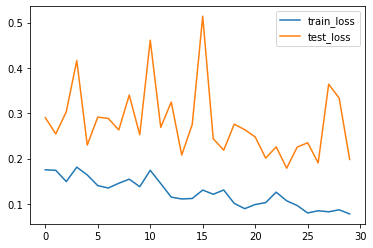

In [ ]:
#Plot the loss:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='test_loss')
plt.legend()
plt.show()

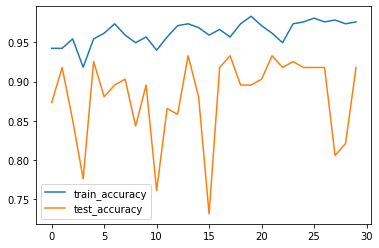

In [ ]:
#Plot the accuracy:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='test_accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('model_vgg19.h5')

In [ ]:
y_pred=model.predict(test_dataset)

In [ ]:
y_pred

array([[9.9998176e-01, 1.8259921e-05],
       [9.9972183e-01, 2.7816513e-04],
       [9.9995768e-01, 4.2343367e-05],
       [9.2515692e-02, 9.0748429e-01],
       [7.1140313e-01, 2.8859693e-01],
       [4.5942092e-01, 5.4057908e-01],
       [8.9483809e-01, 1.0516188e-01],
       [9.9885643e-01, 1.1436354e-03],
       [8.3337083e-02, 9.1666293e-01],
       [4.8378333e-02, 9.5162171e-01],
       [7.6593101e-02, 9.2340690e-01],
       [9.6372205e-01, 3.6277968e-02],
       [8.6479950e-01, 1.3520047e-01],
       [9.0608299e-01, 9.3917035e-02],
       [1.0000000e+00, 2.0942041e-08],
       [6.0697448e-01, 3.9302555e-01],
       [1.5514393e-01, 8.4485608e-01],
       [5.8208320e-02, 9.4179165e-01],
       [6.6847080e-01, 3.3152917e-01],
       [8.2663171e-02, 9.1733688e-01],
       [9.9999011e-01, 9.8627443e-06],
       [9.9436259e-01, 5.6373621e-03],
       [9.9998975e-01, 1.0231342e-05],
       [9.9994314e-01, 5.6899014e-05],
       [9.0499073e-01, 9.5009230e-02],
       [1.3547931e-02, 9.

In [ ]:
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0])

In [ ]:
img=image.load_img('/content/gdrive/My Drive/Dataset/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png',target_size=(224,224))
## We have to convert our image to array every time we have to make predictions
x=image.img_to_array(img)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
## Re-scaling of the Image
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
a=model.predict(img_data)
a=np.argmax(a,axis=1)

In [ ]:
a

array([1])